In [161]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

In [162]:
train = pd.read_csv('Train-Set.csv')
test = pd.read_csv('Test-Set.csv')

In [163]:
train.shape

(54712, 19)

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  object 
dtypes: float64(1), int64(7), 

In [165]:
train.drop(['Unnamed: 0','id'],axis = 1,inplace = True)
test.drop(['Unnamed: 0','id'],axis=1,inplace=True)

### quick submission 

In [166]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
3,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
4,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes


## EDA 

<AxesSubplot:>

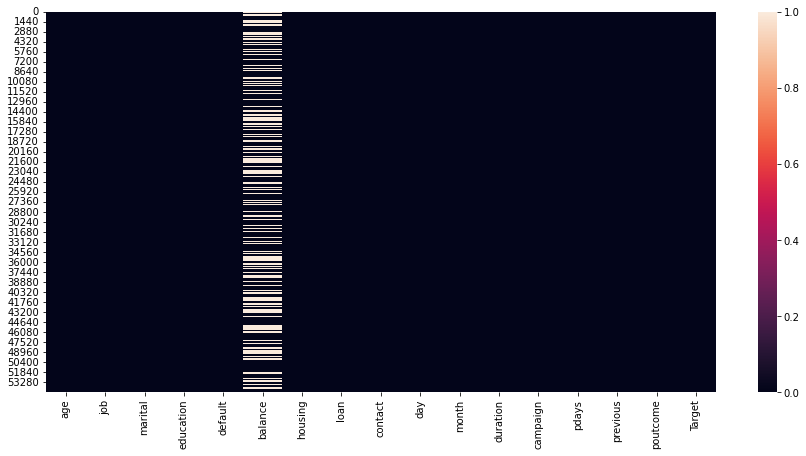

In [25]:
plt.figure(figsize=(15,7),)
sns.heatmap(train.isna())

In [26]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,54712.000000,31842.000000,54712.000000,54712.000000,54712.000000,54712.000000
mean,40.580147,1368.024590,257.282260,2.679961,425.022829,0.407351
std,10.544504,3057.847866,255.270335,2.966822,476.813012,1.520253
min,17.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,73.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,180.000000,2.000000,88.000000,0.000000
75%,48.000000,1435.000000,318.000000,3.000000,999.000000,0.000000
max,98.000000,98417.000000,4199.000000,58.000000,999.000000,58.000000


### Handeling missing values 

using iterative imputation 

In [167]:
cat_column = ['job','marital','education','default','housing','loan','contact','poutcome']
columns_for_imputation = ['age', 'balance', 'duration','job','marital','education','default','housing','loan','contact','poutcome']

In [168]:
encoder = LabelEncoder()

def encod(column):
    n_nulls = pd.notnull(column)
    encoded_column = encoder.fit_transform(column[n_nulls])
    column.loc[n_nulls] = encoded_column
    return column

In [169]:
imputer = IterativeImputer(estimator=BayesianRidge())
train_cat = train[columns_for_imputation]
test_cat = test[columns_for_imputation]

In [170]:
for col in columns_for_imputation:
    if col in cat_column:
        encod(train_cat[col])
        imputed_data = imputer.fit_transform(train_cat[col].values.reshape(-1,1))
        imputed_data = imputed_data.astype('int64')
        imputed_data = pd.DataFrame(imputed_data)
        imputed_data = encoder.inverse_transform(imputed_data.values.reshape(-1,1))
    else:
        imputed_data = imputer.fit_transform(train_cat[col].values.reshape(-1,1))
        imputed_data = imputed_data.astype('int64')
        imputed_data = pd.DataFrame(imputed_data)
    train_cat[col] = imputed_data
train[columns_for_imputation]= train_cat

In [171]:
for col in columns_for_imputation:
    if col in cat_column:
        encod(test_cat[col])
        imputed_data = imputer.fit_transform(test_cat[col].values.reshape(-1,1))
        imputed_data = imputed_data.astype('int64')
        imputed_data = pd.DataFrame(imputed_data)
        imputed_data = encoder.inverse_transform(imputed_data.values.reshape(-1,1))
    else:
        imputed_data = imputer.fit_transform(test_cat[col].values.reshape(-1,1))
        imputed_data = imputed_data.astype('int64')
        imputed_data = pd.DataFrame(imputed_data)
    test_cat[col] = imputed_data
test[columns_for_imputation]= test_cat

### Univariate Analysis 


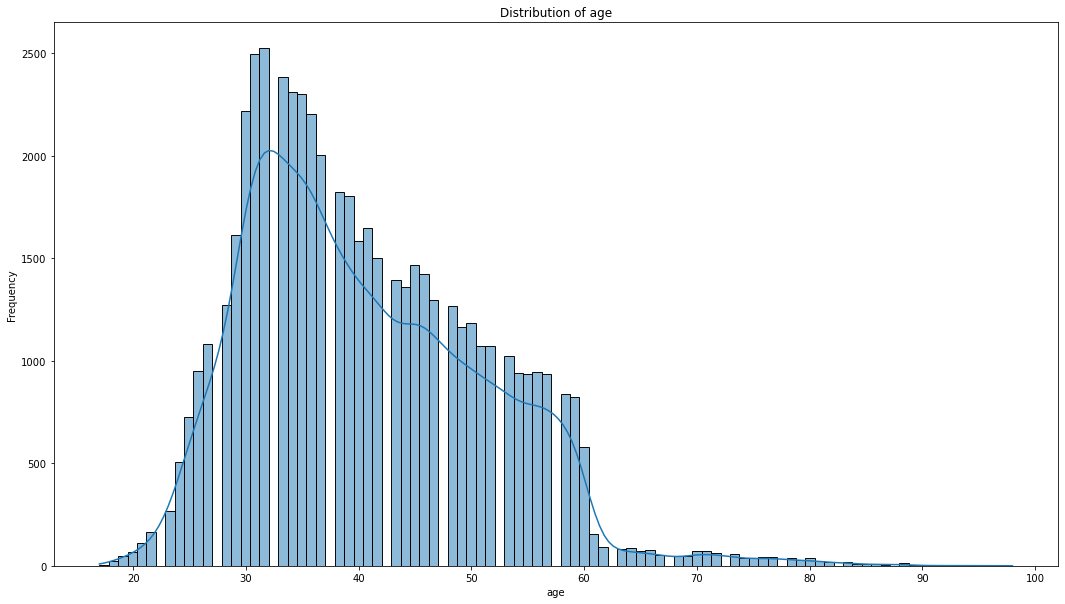

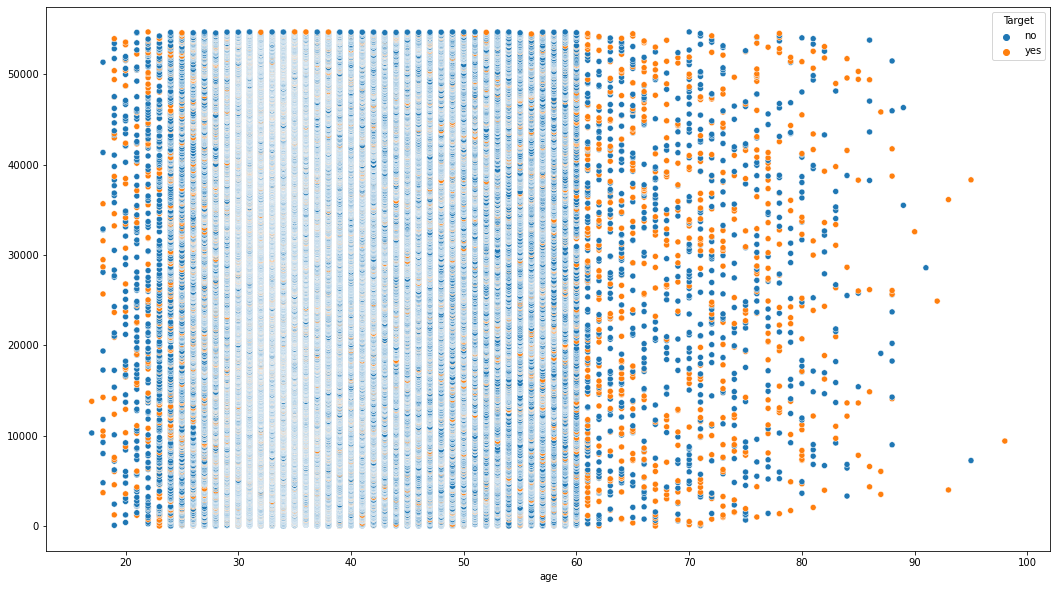

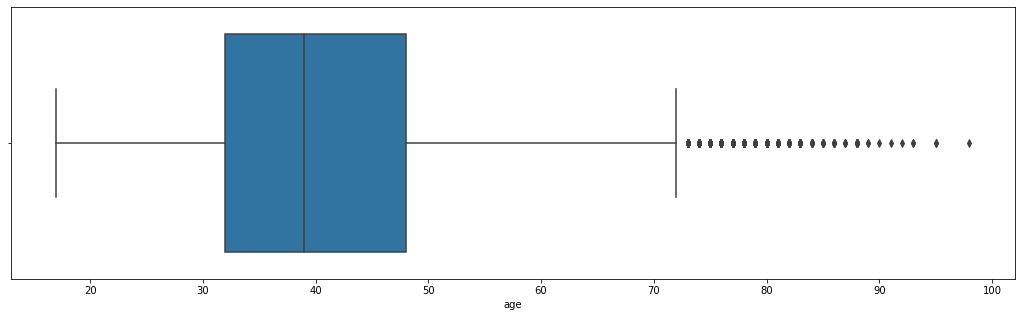

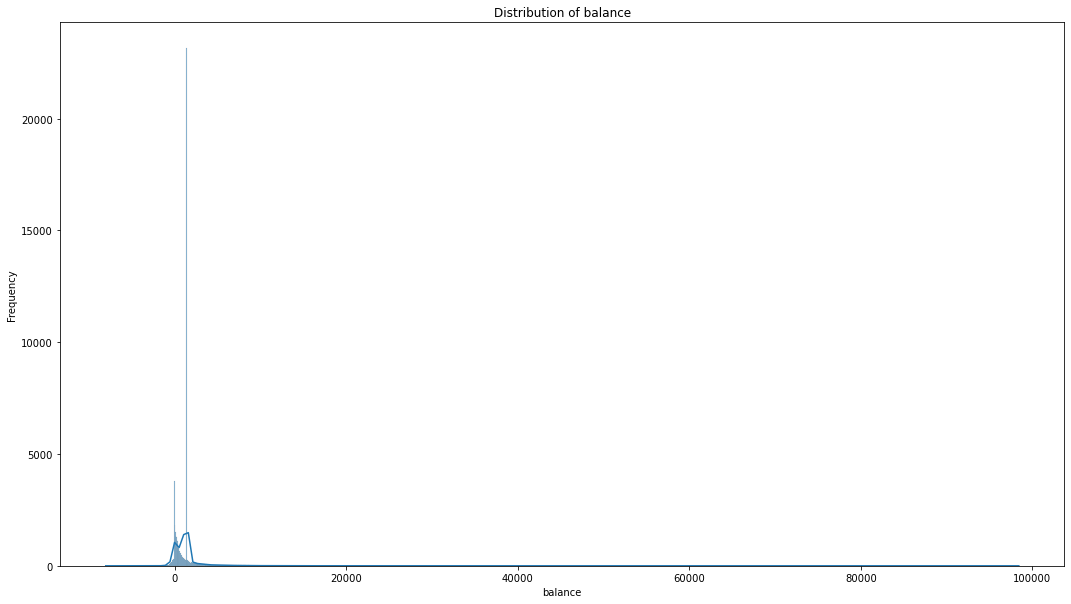

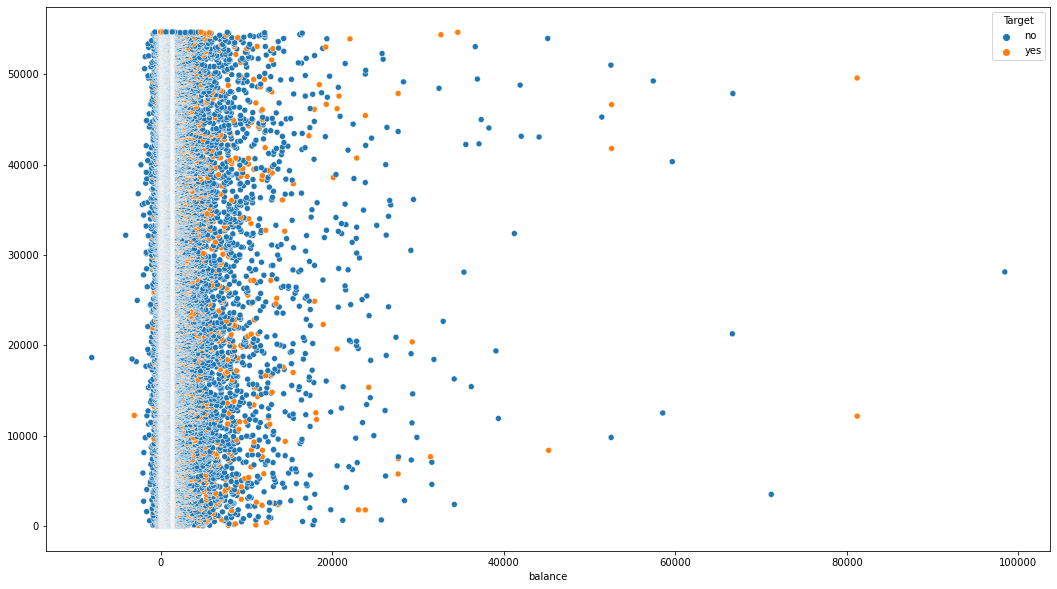

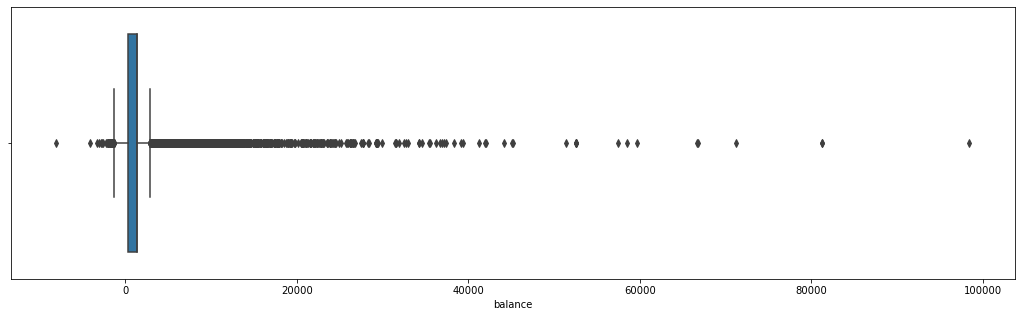

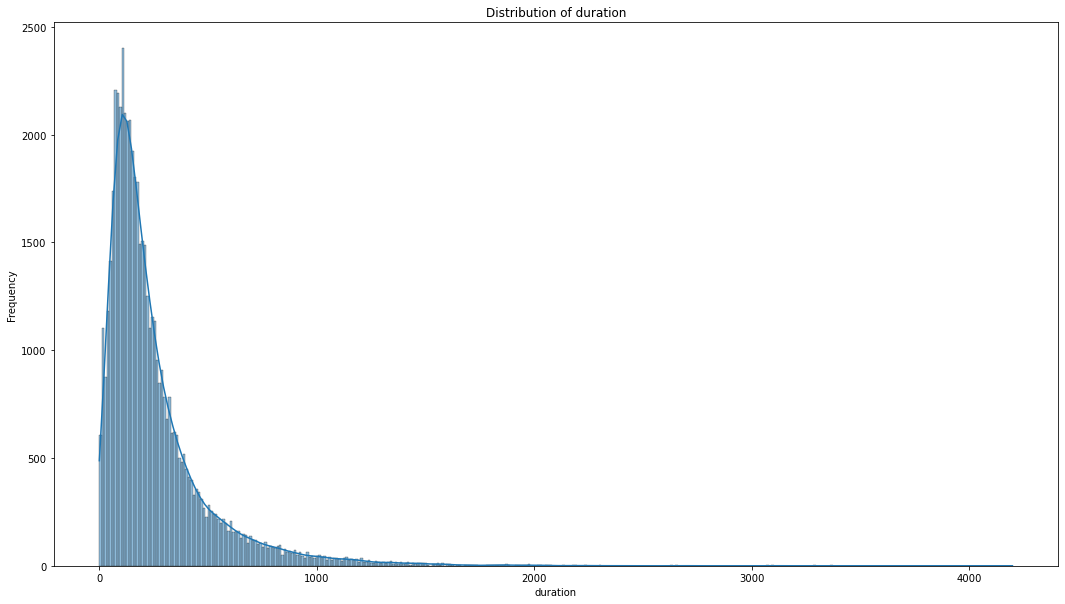

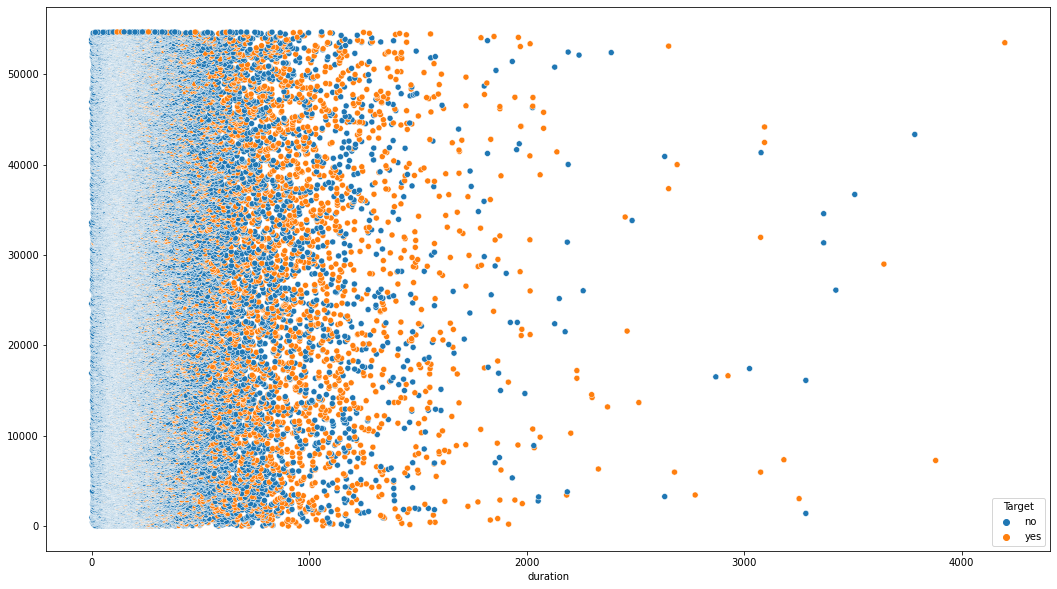

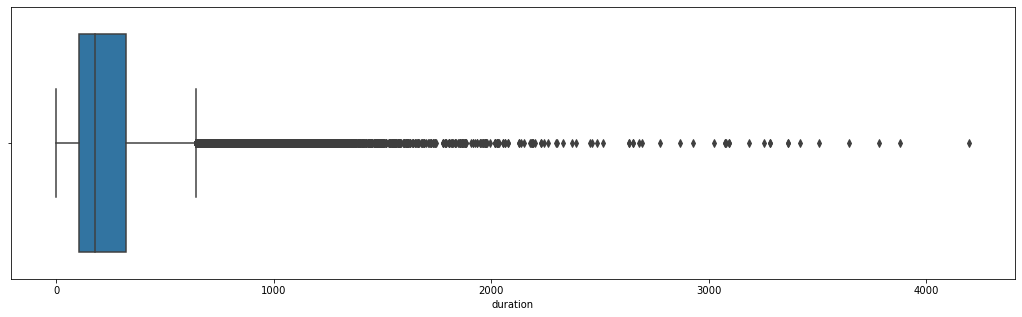

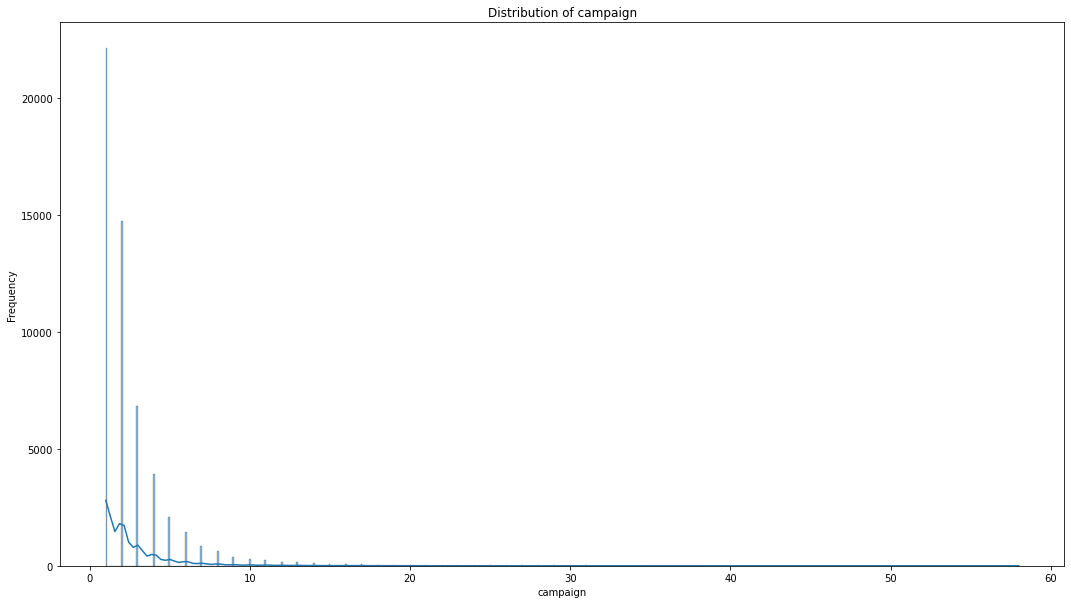

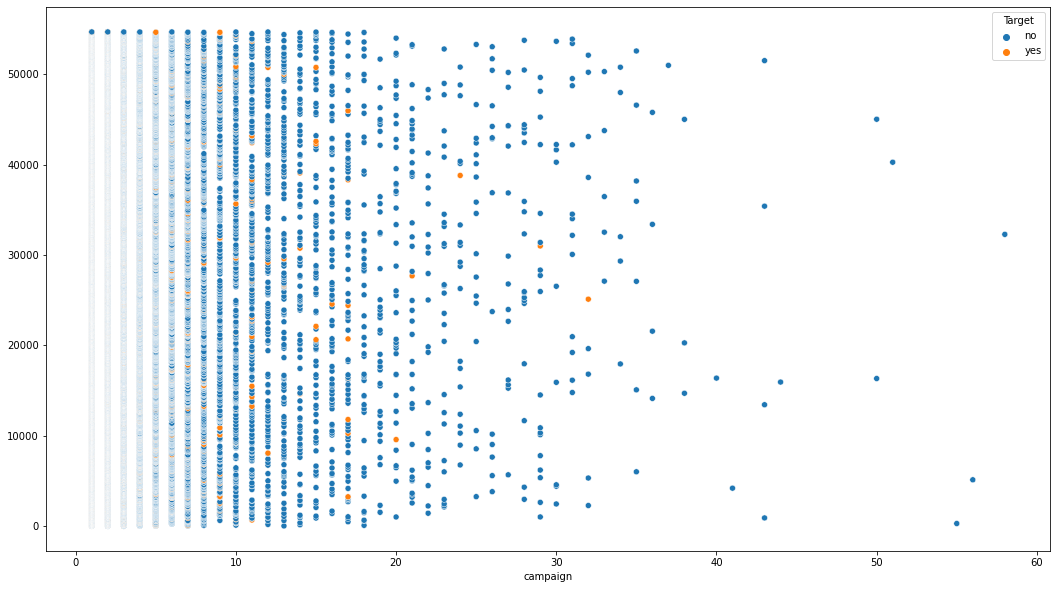

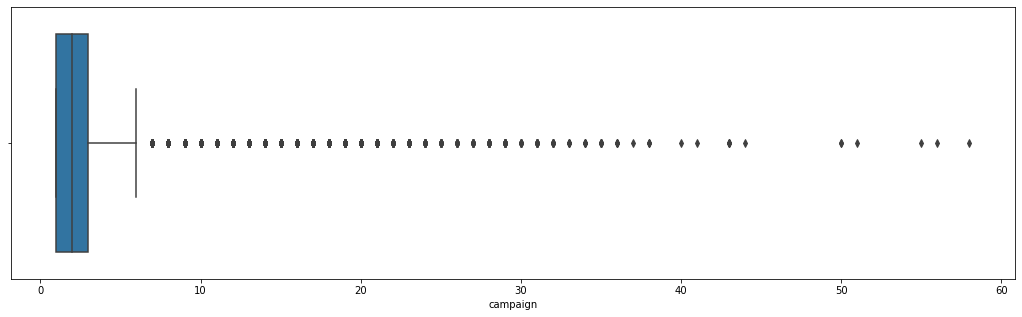

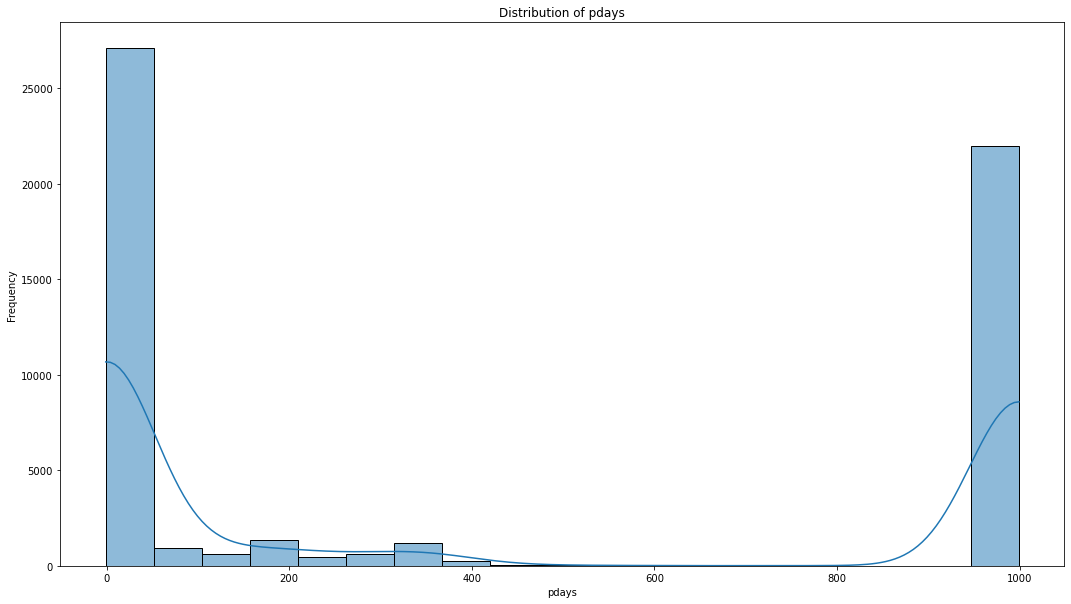

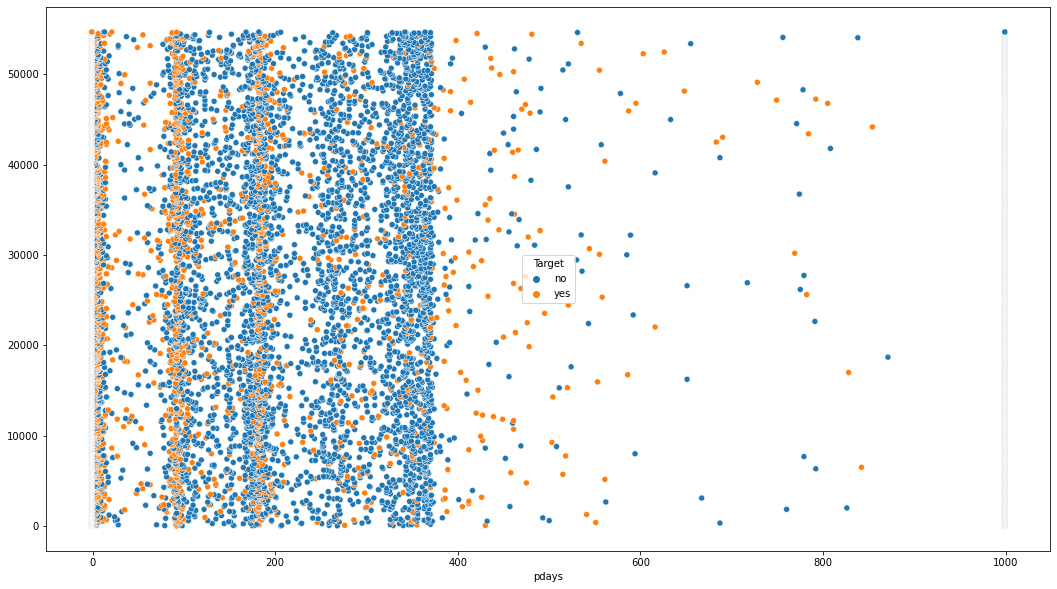

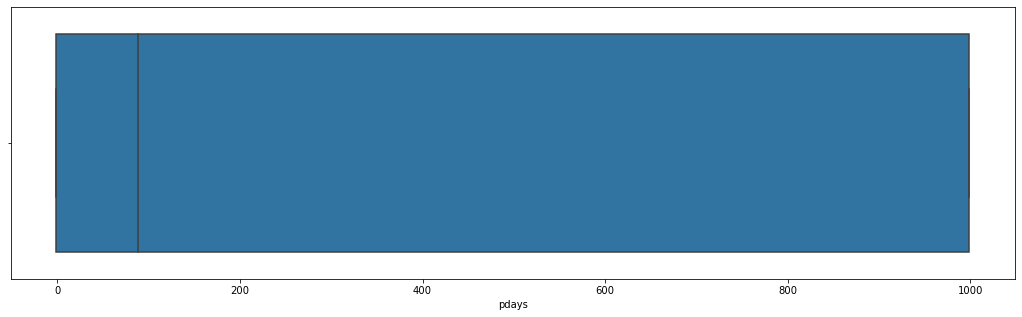

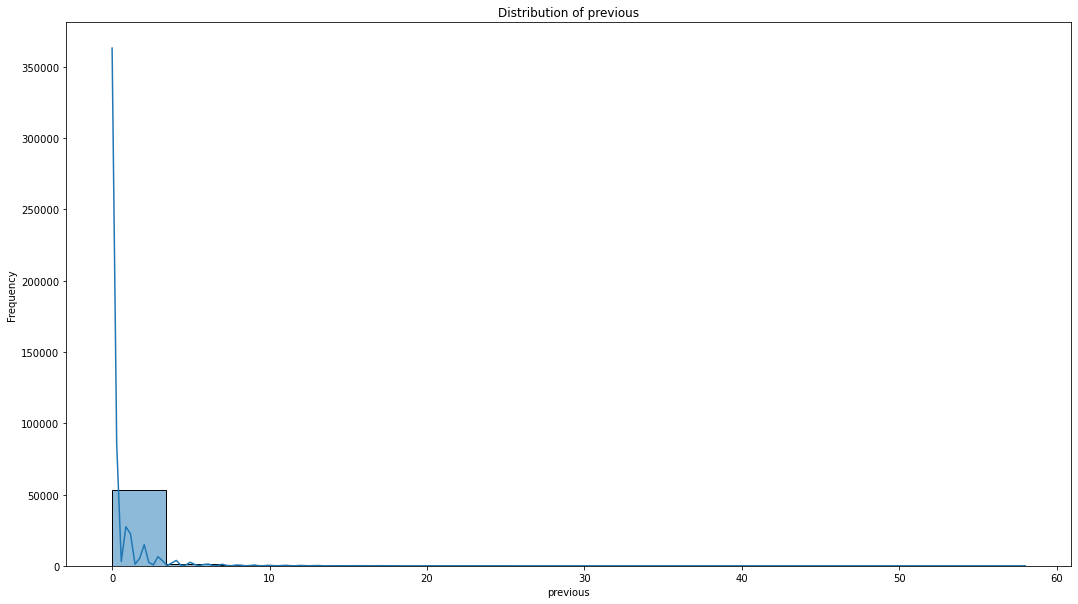

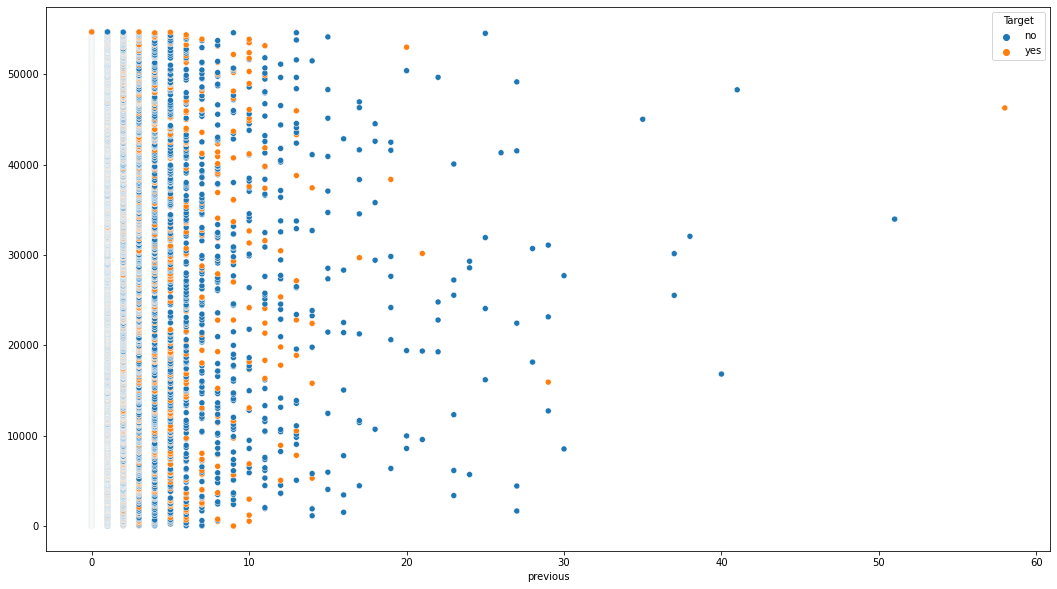

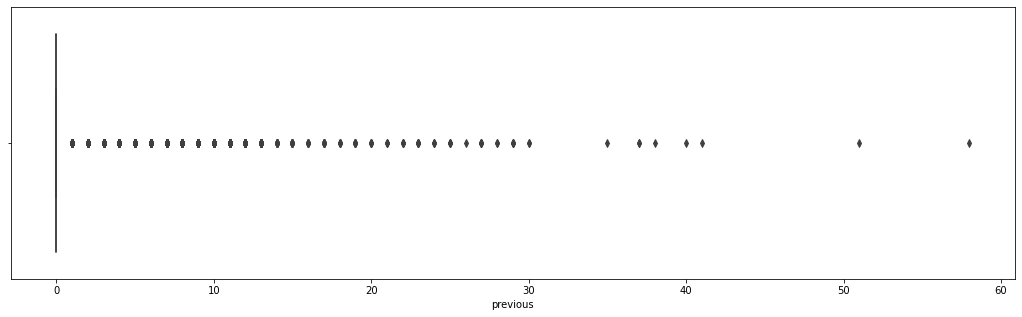

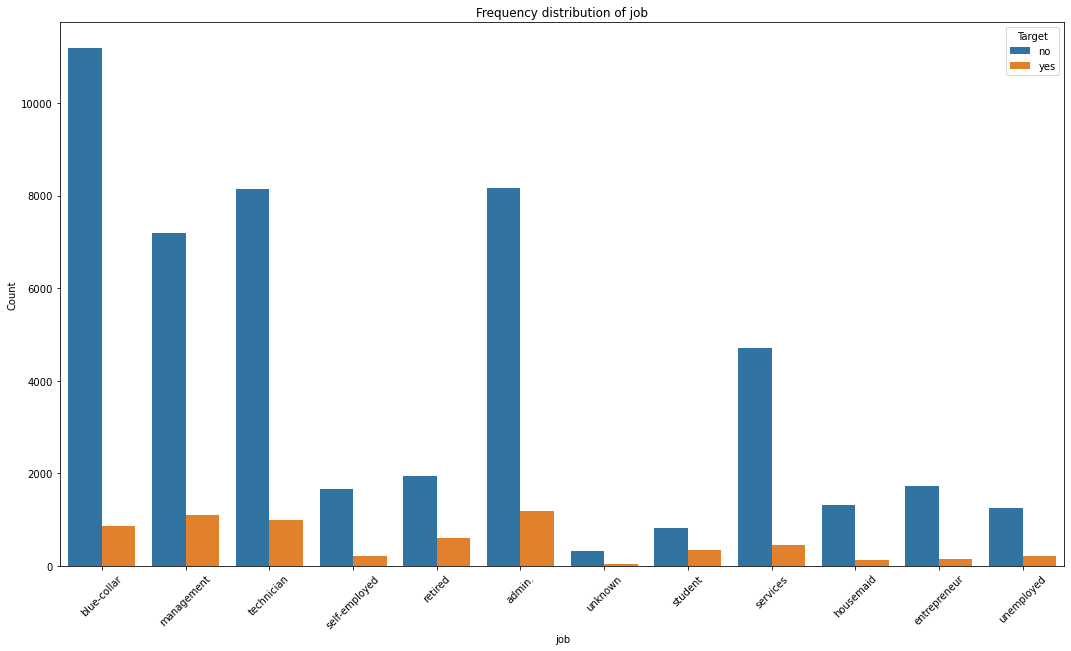

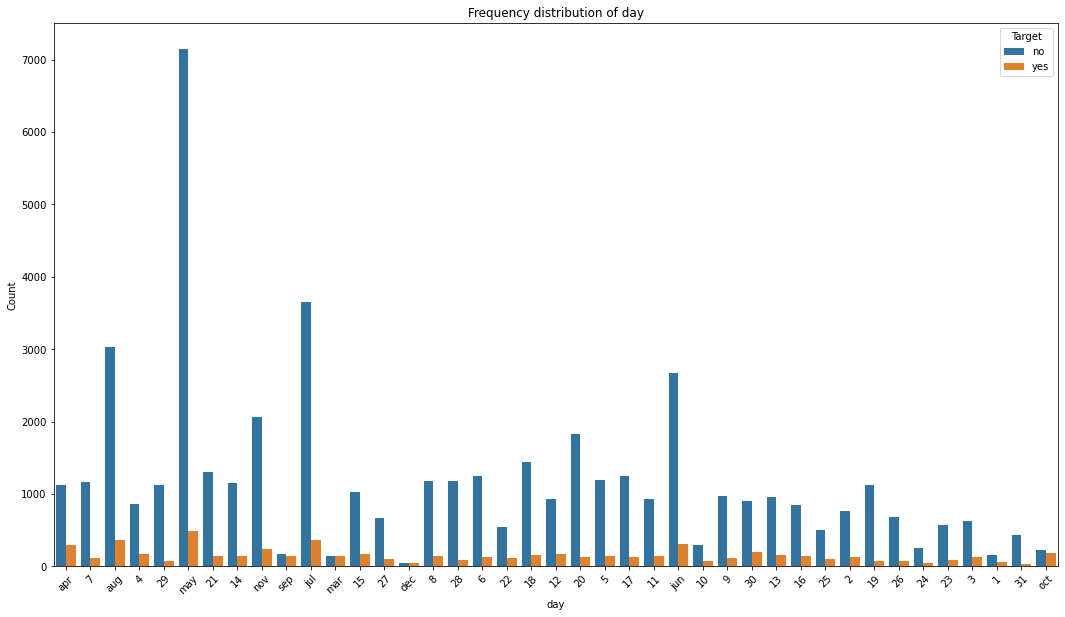

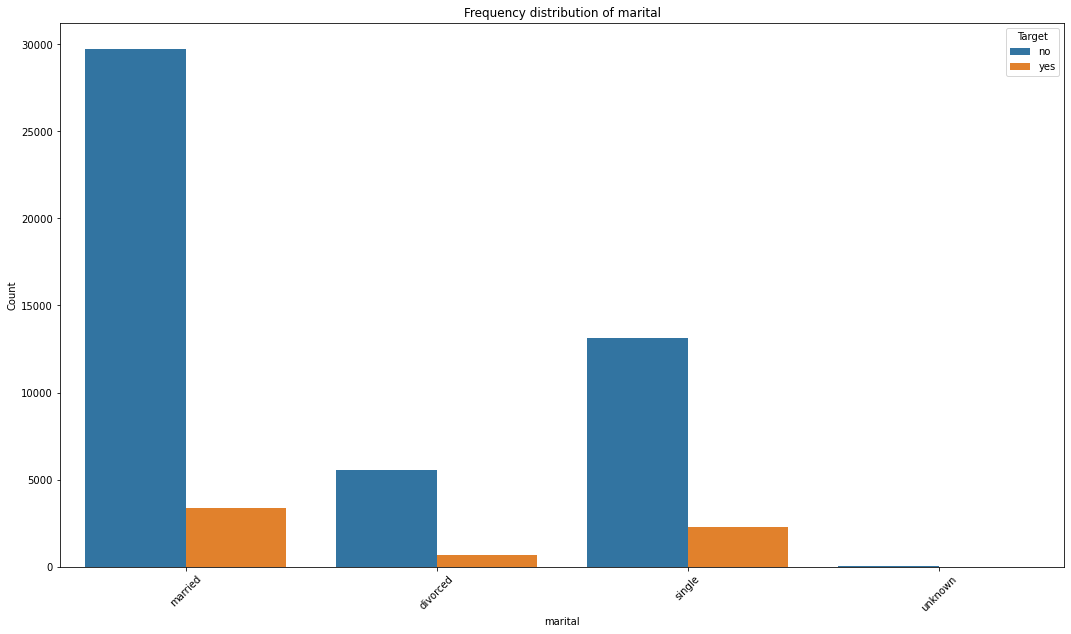

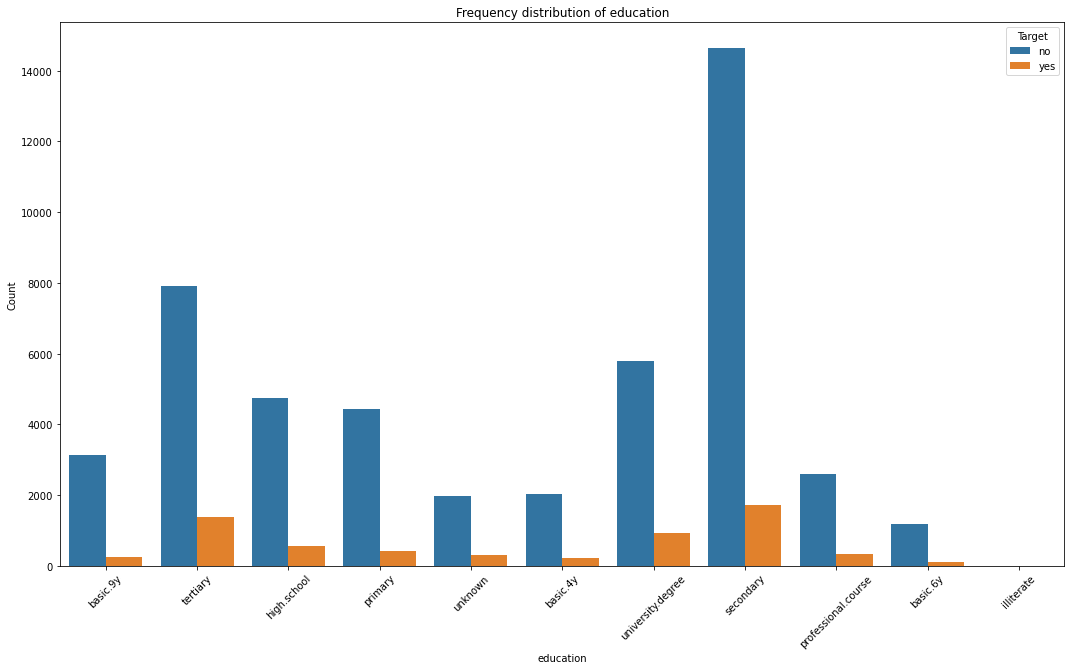

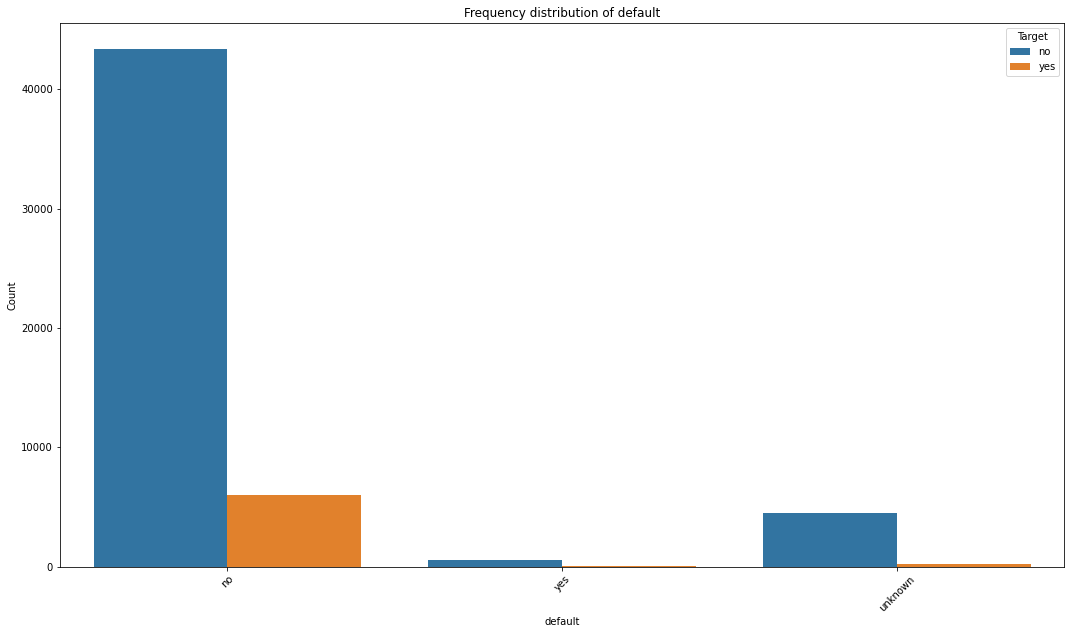

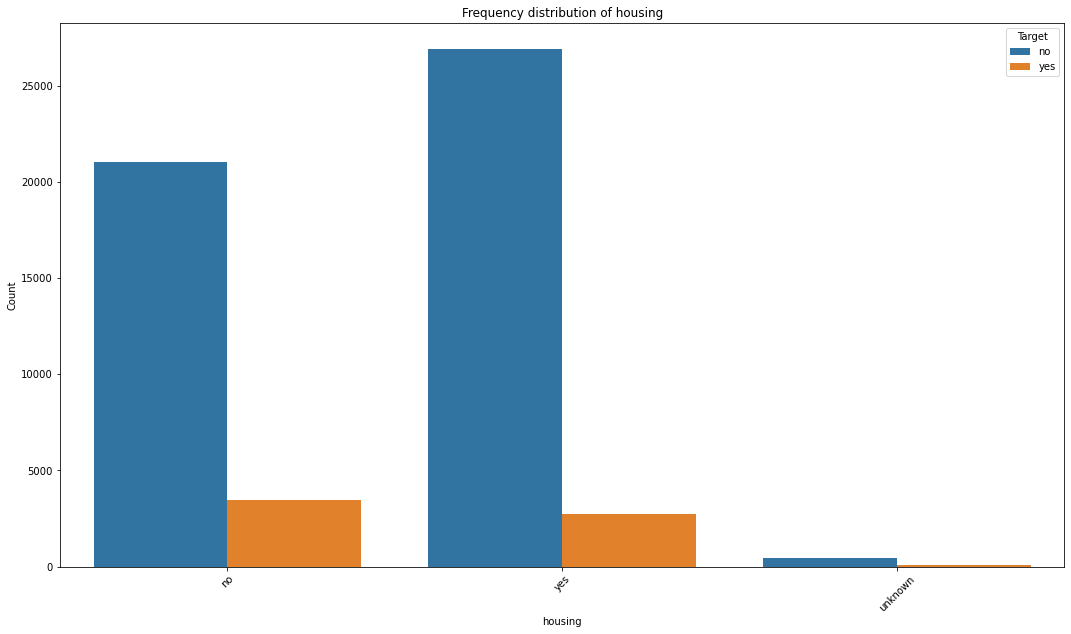

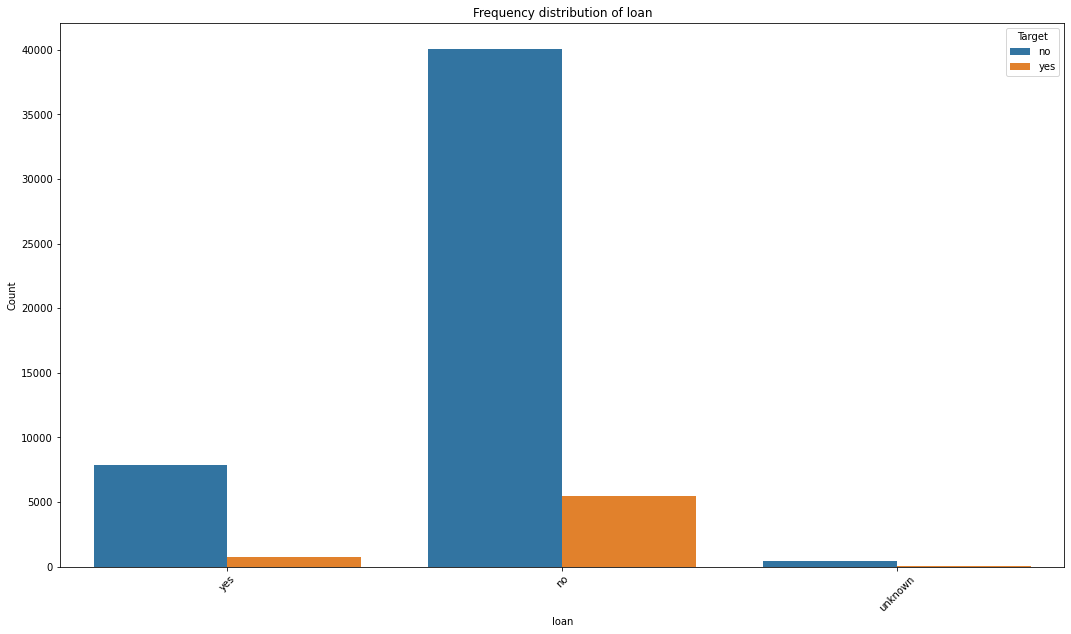

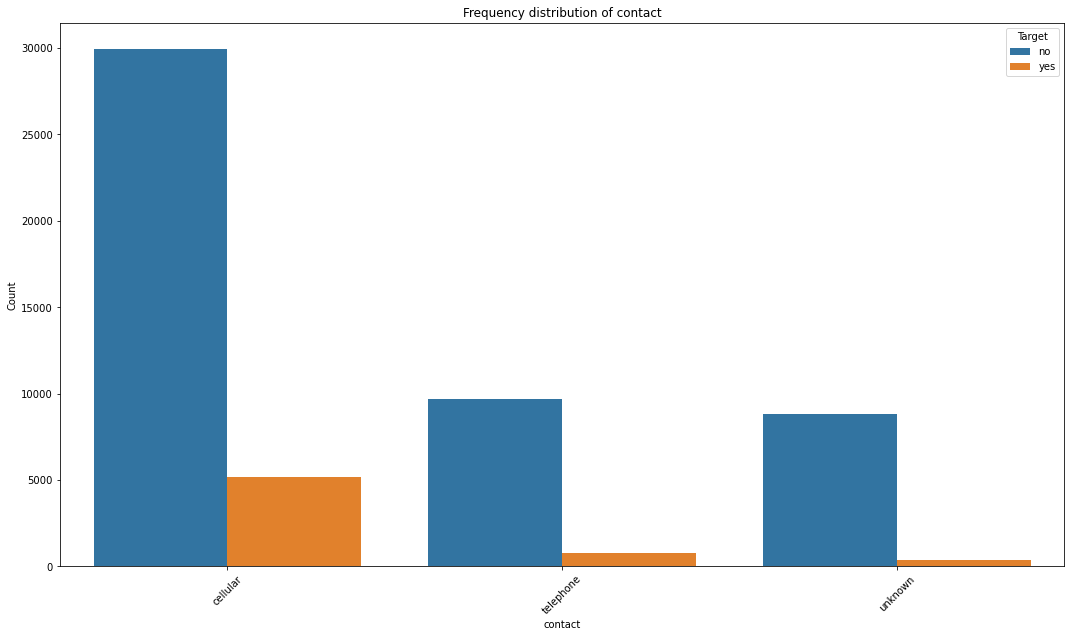

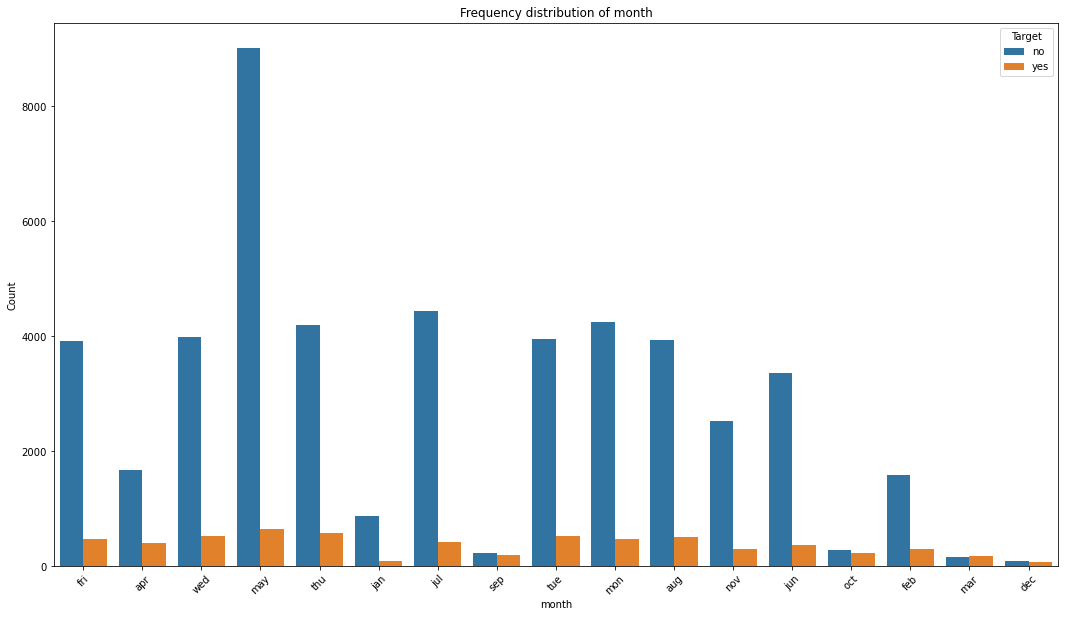

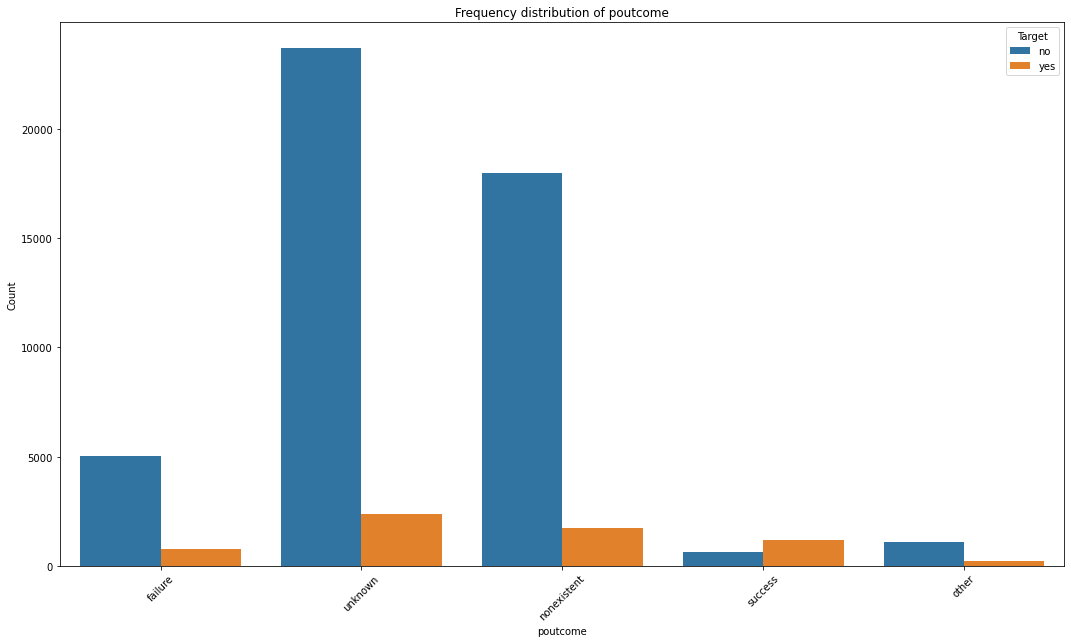

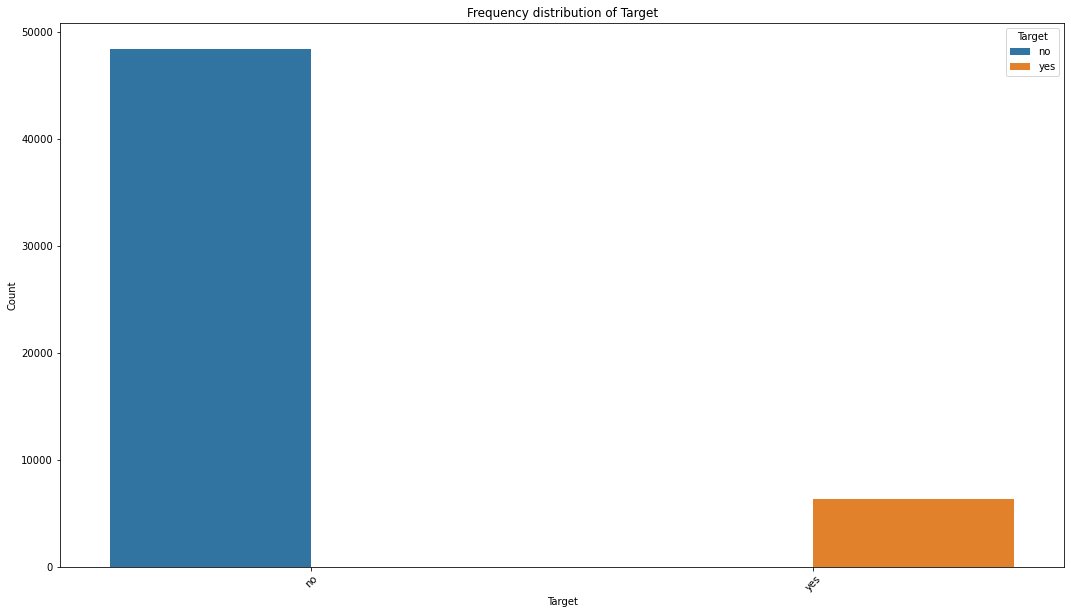

In [64]:
numeric_summary = train.describe()


categorical_columns = ['job','day', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']
categorical_summary = {}
for col in categorical_columns:
    categorical_summary[col] = train[col].value_counts()


for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
        
    plt.figure(figsize=(18,10))
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(18,10))
    sns.scatterplot(train[col],y=train.index,hue=train['Target'])
    plt.show()
    
    plt.figure(figsize=(18,5))
    sns.boxplot(train[col])

# Plot bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(18,10))
    sns.countplot(train[col],hue=train['Target'])
    plt.title(f'Frequency distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Education classes handeling

In [172]:
def education(row):
    word = row['education']
    if word=='basic.4y' or word=='primary' or word=='basic.6y' or word =='basic.9y':
        row['education'] = 'basic'
    if word == 'university.degree':
        row['education'] = 'tertiary'
    if word == 'high.school':
        row['education'] = 'secondary'
    return row

In [173]:
train = train.apply(education , axis = 1)
test = test.apply(education , axis= 1)

### Job classes handeling

In [174]:
def job_merg (row) : 
    word = row['job']
    if word == 'housemaid' or word == 'unknown':
        row['job'] = 'unemployed'
    if word == 'entrepreneur':
        row['job'] = 'self-employed'
    return row

In [175]:
train = train.apply(job_merg,axis=1)
test = test.apply(job_merg , axis = 1)

### working on days and month columns 

In [176]:
def month_edit(row):
    months = ['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'feb', 'jan', 'oct', 'sep', 'mar', 'dec']
    
    if row['month'] not in months:
        x = row['month']
        row['month'] = row['day']
        row['day'] = x
    return row

In [177]:
train = train.apply(month_edit,axis=1)
test = test.apply(month_edit,axis=1)

In [178]:
train.drop(['day'],axis=1,inplace= True)
test.drop(['day'],axis= 1 , inplace= True)

### Working on marital column 

In [179]:
def marital_merg (row):
    if row['marital'] == 'unknown':
        row['marital'] = 'married'
        
    return row

In [180]:
train = train.apply(marital_merg,axis=1)

test = test.apply(marital_merg,axis=1)

### Working on (loan, contact, housing, deafult) columns 


In [182]:
columns = ['housing','loan','contact','default']

def mix_merg(row, columns, df):
    for col in columns:
        if row[col] == 'unknown':
            row[col] = df[col].mode()[0]
    return row

In [183]:
train = train.apply(lambda row : mix_merg(row,columns,train),axis = 1)
test = test.apply(lambda row : mix_merg(row,columns,test),axis = 1)

### Dealing with poutcome column  

In [184]:
train.poutcome.value_counts()

unknown        26057
nonexistent    19704
failure         5809
success         1855
other           1287
Name: poutcome, dtype: int64

In [185]:
def poutcome_merg (row):
    if row['poutcome'] == 'other':
        row['poutcome'] = 'unknown'
        
    return row

In [186]:
train = train.apply(poutcome_merg,axis=1)
test = test.apply(poutcome_merg,axis=1) 

### mapping target variable 

In [200]:
train.Target.value_counts()

no     48433
yes     6279
Name: Target, dtype: int64

In [205]:
mapp = {'yes':1,'no':0}

train.Target = train.Target.map(mapp)


### discover the correlation between features 

In [206]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,47,blue-collar,married,basic,no,1368,no,yes,cellular,apr,583,2,999,1,failure,0
1,48,management,divorced,tertiary,no,351,yes,no,cellular,apr,725,3,-1,0,unknown,0
2,38,technician,single,secondary,no,1368,no,no,cellular,aug,74,2,999,0,nonexistent,0
3,50,management,divorced,tertiary,no,1270,yes,no,cellular,may,24,3,-1,0,unknown,0
4,54,self-employed,married,secondary,no,1368,yes,yes,cellular,aug,904,3,999,0,nonexistent,1


In [211]:
Continuous =['age','balance','duration','pdays','campaign','previous'] 
Categorical = ['job','marital','education','default','housing','loan','contact','month',
            'poutcome']

#### Continous VS target 


In [212]:
# we will use logistic regression to calculate the correlation between continous and target 
from sklearn.linear_model import LogisticRegression
X = train[Continuous]
y = train['Target']

In [213]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

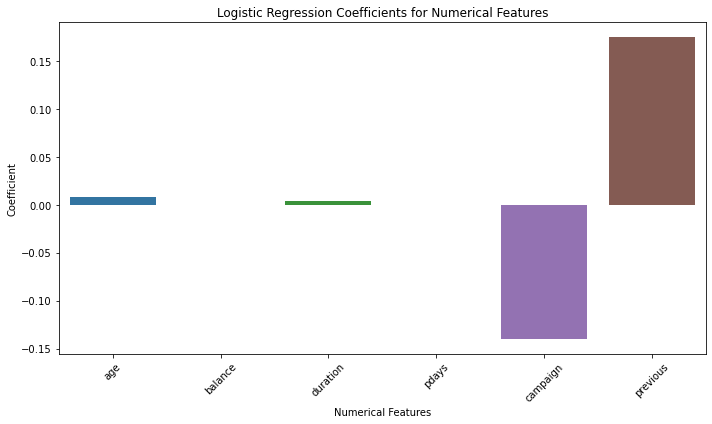

In [215]:
coefficients = model.coef_[0]

# Create a DataFrame for plotting
coeff_df = pd.DataFrame({'Feature': Continuous, 'Coefficient': coefficients})

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=coeff_df)
plt.title('Logistic Regression Coefficients for Numerical Features')
plt.xlabel('Numerical Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

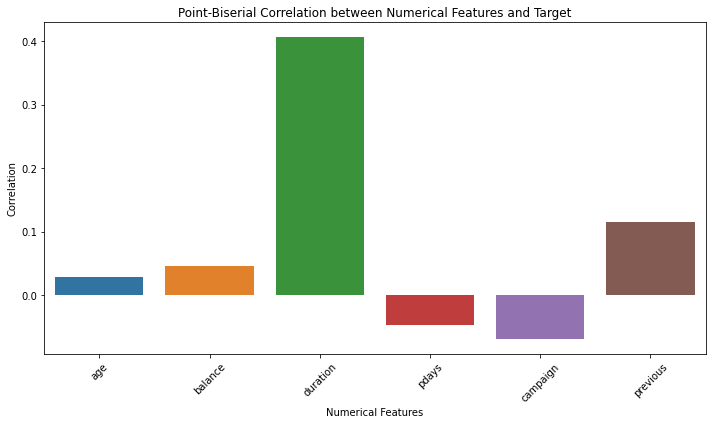

In [217]:
# check the results using poin_presal correlation 
from scipy.stats import pointbiserialr

correlation_coefficients = []
for feature in Continuous:
    correlation, _ = pointbiserialr(train[feature], train['Target'])
    correlation_coefficients.append(correlation)


correlation_df = pd.DataFrame({'Feature': Continuous, 'Correlation': correlation_coefficients})


plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Correlation', data=correlation_df)
plt.title('Point-Biserial Correlation between Numerical Features and Target')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [218]:
# so let's drop (age, balance,pdays)
train.drop(['age','balance','pdays'],axis=1,inplace=True)
test.drop(['age','balance','pdays'],axis=1,inplace=True)

#### Categorical VS target 

In [219]:
from scipy.stats import chi2_contingency
correlations = {}
for feature in Categorical:
    contingency_table = pd.crosstab(train[feature], train['Target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    correlations[feature] = {'chi2': chi2, 'p-value': p}

# Print the correlations
for feature, values in correlations.items():
    print(f"{feature}: Chi-squared = {values['chi2']}, p-value = {values['p-value']}")

job: Chi-squared = 1060.0996846802352, p-value = 1.5832065065581317e-223
marital: Chi-squared = 212.783496268201, p-value = 6.232336088677364e-47
education: Chi-squared = 266.49700730849486, p-value = 1.5817838464089539e-55
default: Chi-squared = 19.738960795421978, p-value = 8.877298287511788e-06
housing: Chi-squared = 304.01456942390234, p-value = 4.3969439819517e-68
loan: Chi-squared = 103.43591165685827, p-value = 2.689551240712349e-24
contact: Chi-squared = 233.9243003923301, p-value = 8.309001655781682e-53
month: Chi-squared = 3904.3066657250165, p-value = 0.0
poutcome: Chi-squared = 5378.465255381648, p-value = 0.0


In [220]:
# Lower p values indecates that we have good relationship between features 
train.drop(['marital','default','housing','loan',"contact"],axis=1,inplace = True)
test.drop(['marital','default','housing','loan',"contact"],axis=1,inplace = True)

In [249]:
X = train.drop(['Target'],axis=1)
y = train['Target']

In [250]:
train.head()

,job,education,month,duration,campaign,previous,poutcome,Target
0,blue-collar,basic,apr,583,2,1,failure,0
1,management,tertiary,apr,725,3,0,unknown,0
2,technician,secondary,aug,74,2,0,nonexistent,0
3,management,tertiary,may,24,3,0,unknown,0
4,self-employed,secondary,aug,904,3,0,nonexistent,1


In [251]:
poutcome_encoding = {'unknown': 0, 'nonexistent': 1, 'failure': 2, 'success': 3}

In [252]:
month_proportions = train.groupby('month')['Target'].mean()

# Rank the months based on their proportions and assign an encoding
ranked_months = month_proportions.rank(ascending=False)
month_encoding_map = ranked_months.to_dict()

In [261]:
X.month = X.month.map(month_encoding_map)
test.month = test.month.map(month_encoding_map)

X.poutcome = X.poutcome.map(poutcome_encoding)
test.poutcome = test.poutcome.map(poutcome_encoding)

In [258]:
from category_encoders import BinaryEncoder
# test = BinaryEncoder(cols=['education']).fit(X).transform(test)
X = BinaryEncoder(cols=['education']).fit(X).transform(X)

test = BinaryEncoder(cols=['job']).fit(X).transform(test)
X = BinaryEncoder(cols=['job']).fit(X).transform(X)


In [264]:
X

,job_0,job_1,job_2,job_3,education_0,education_1,education_2,month,duration,campaign,previous,poutcome
0,0,0,0,1,0,0,1,5.0,583,2,1,2
1,0,0,1,0,0,1,0,5.0,725,3,0,0
2,0,0,1,1,0,1,1,7.0,74,2,0,1
3,0,0,1,0,0,1,0,12.0,24,3,0,0
4,0,1,0,0,0,1,1,7.0,904,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54707,0,0,1,0,0,1,0,7.0,233,12,0,0
54708,1,0,0,1,0,1,1,12.0,636,6,0,1
54709,0,0,1,0,0,1,0,10.0,261,2,0,0
54710,0,1,0,1,0,1,1,5.0,149,2,1,2


In [265]:
from sklearn.preprocessing import StandardScaler
sclaing = ['duration','previous','campaign',]
scaler = StandardScaler()
X[sclaing] = scaler.fit_transform(train[sclaing])
test[sclaing] = scaler.transform(test[sclaing])

In [24]:
scaler = StandardScaler()
train[sclaing] = scaler.fit_transform(train[sclaing])
test[sclaing] = scaler.transform(test[sclaing])

### Modeling 

In [268]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics  import accuracy_score, f1_score, classification_report , confusion_matrix

In [269]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25,stratify=y)

In [270]:
smt= SMOTETomek()
X_train_balanced , y_train_balanced = smt.fit_resample(X_train,y_train)


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [282]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(), 
    BaggingClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(),
    RidgeClassifier(),
    Lasso(),
    Perceptron(),
    SGDClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
]

# Loop over classifiers
for classifier in classifiers:
    print("Classifier:", type(classifier).__name__)
    classifier.fit(X_train_balanced, y_train_balanced)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    mat = confusion_matrix(y_test,y_pred)
    print(f'{type(classifier).__name__}:')
    print(f'  Accuracy: {accuracy:.2f}')
    print(f'  F1 Score: {f1:.2f}')
    print(f'  Classification Report:\n{report}\n')
    print(f'   Confusion matrix:\n{mat}\n')

Classifier: LogisticRegression
LogisticRegression:
  Accuracy: 0.82
  F1 Score: 0.84
  Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     12108
           1       0.37      0.79      0.50      1570

    accuracy                           0.82     13678
   macro avg       0.67      0.81      0.69     13678
weighted avg       0.90      0.82      0.84     13678


   Confusion matrix:
[[9957 2151]
 [ 328 1242]]

Classifier: DecisionTreeClassifier
DecisionTreeClassifier:
  Accuracy: 0.84
  F1 Score: 0.85
  Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     12108
           1       0.36      0.58      0.45      1570

    accuracy                           0.84     13678
   macro avg       0.65      0.72      0.67     13678
weighted avg       0.87      0.84      0.85     13678


   Confusion matrix:
[[10517  1591]
 [  661   909]]

Classifier: Ra

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [272]:
model = GradientBoostingClassifier()
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)
mat = confusion_matrix(y_test,y_pred)
print(f'{name}:')
print(f'  Accuracy: {accuracy:.2f}')
print(f'  F1 Score: {f1:.2f}')
print(f'  Classification Report:\n{report}\n')
print(f'   Confusion matrix:\n{mat}\n')

Support Vector Classifier:
  Accuracy: 0.85
  F1 Score: 0.87
  Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     12108
           1       0.42      0.79      0.55      1570

    accuracy                           0.85     13678
   macro avg       0.69      0.82      0.73     13678
weighted avg       0.91      0.85      0.87     13678


   Confusion matrix:
[[10373  1735]
 [  332  1238]]



In [273]:
target = model.predict(test)

In [274]:
final = pd.read_csv('Test-Set.csv')

id_test = final.id.values 

In [198]:
mapp = {'yes':1,'no':0}

In [275]:
final = pd.DataFrame({'id':id_test,'Target':target},columns=['id','Target'])

In [200]:
final.Target = final.Target.map(mapp)

In [276]:
final.to_csv('GBC_sumbission.csv',index=False)

Index(['id', 'Target'], dtype='object')